# Training Mask RCNN to instance-segment food images and estimate the calorie content


In [1]:
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 943, done.
remote: Total 943 (delta 0), reused 0 (delta 0), pack-reused 943
Receiving objects: 100% (943/943), 139.81 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (534/534), done.


### Downloading the Dataset with necessary annotations
This is UNIMIB2016 food dataset, this is prepared by University of Milano-Bicocca,Italy.
The dataset contained 1027 instance-segmented images and contained 73 food classes,however given the number of dataset the number of class is quite large so the food classes only occuring less than 90times were excluded and some varietes of "pasta" were merged into single class name so that model could learn faster and better from available set of data.

---


The dataset of 1027 was divided into train and validation category so that it could be used to train and analyse validate the model every epoch.

---


The dataset annotations were given in a MATLAB file which was couldn't be parsed using just python and neither did the octave so, I had to use MATLAB to open the file and scrap the annotations data off of it to a text file and then to a JSON format.




In [2]:
%cd Mask_RCNN/
!git clone https://github.com/binayakpokhrel/datasets

/content/Mask_RCNN
Cloning into 'datasets'...
remote: Enumerating objects: 1063, done.
remote: Total 1063 (delta 0), reused 0 (delta 0), pack-reused 1063
Receiving objects: 100% (1063/1063), 2.39 GiB | 15.66 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Checking out files: 100% (965/965), done.


### Cloning the main application folder from github

In [18]:
%cd /content/Mask_RCNN/samples/
!rm -R food_mask
!git clone https://github.com/binayakpokhrel/food_mask
% cd food_mask

/content/Mask_RCNN/samples
Cloning into 'food_mask'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 36 (delta 13), reused 29 (delta 6), pack-reused 0
Unpacking objects: 100% (36/36), done.
/content/Mask_RCNN/samples/food_mask


In [2]:
%cd /content/Mask_RCNN/samples/food_mask/

/content/Mask_RCNN/samples/food_mask


### Imports and refrences

In [3]:
import random
import os
import sys


ROOT_DIR = os.path.abspath("../../")

sys.path.append(ROOT_DIR)  # To find local version of the library


from food_mask import food
import mrcnn.model as modellib
from mrcnn import utils
from mrcnn import visualize
from mrcnn.model import log

MODEL_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


## Setting the custom configurations for food images from food.py file
- smaller anchor scales are added in place of bigger anchors as the image objects are relatively smaller
-2 images are trained in one time
-number of classes added
- validation steps changed to 10

In [0]:
config = food.FoodConfig()
FOOD_DIR = os.path.join(ROOT_DIR, "datasets/food")

### Preview of the available dataset
-dataset.prepare() prepares the class_names ,class_ids and refrences to image paths

In [0]:
dataset = food.FoodDataset()
dataset.load_food(FOOD_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 722
Class Count: 13
  0. BG                                                
  1. pudding/custard                                   
  2. smashed potatoes                                  
  3. carrots                                           
  4. spanich                                           
  5.  veal breaded cutlet                              
  6. oranges                                           
  7. scallops                                          
  8. beans                                             
  9. bread                                             
 10. yogurt                                            
 11. pizza                                             
 12. pasta                                             


## For training the model is created in training mode with the above config 

In [6]:
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
%cd /content/Mask_RCNN
!mkdir logs
%cd logs
# !wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

    #uncomment below code to use the pre-trained weights
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ovmfOESjJkpYvPwL4KNnat4i9HA9ftqp' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ovmfOESjJkpYvPwL4KNnat4i9HA9ftqp" -O model_044.h5 && rm -rf /tmp/cookies.txt


/content/Mask_RCNN
/content/Mask_RCNN/logs
--2019-02-28 03:03:42--  https://docs.google.com/uc?export=download&confirm=oAF0&id=1ovmfOESjJkpYvPwL4KNnat4i9HA9ftqp
Resolving docs.google.com (docs.google.com)... 108.177.97.100, 108.177.97.101, 108.177.97.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/chtcfhtgbk7dm2kb1qkl8gm9uh2h9utr/1551319200000/11804986096282121208/*/1ovmfOESjJkpYvPwL4KNnat4i9HA9ftqp?e=download [following]
--2019-02-28 03:03:43--  https://doc-0k-98-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/chtcfhtgbk7dm2kb1qkl8gm9uh2h9utr/1551319200000/11804986096282121208/*/1ovmfOESjJkpYvPwL4KNnat4i9HA9ftqp?e=download
Resolving doc-0k-98-docs.googleusercontent.com (doc-0k-98-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connec

In [0]:
COCO_MODEL_PATH='/content/Mask_RCNN/logs/mask_rcnn_coco.h5'

###For training there is an option for choosing the weights of 'coco' trained weights or imagenet or the last trained saved model 

In [0]:
init_with = "coco" 
if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    #skipping the layers different due to the class numbers
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights("/content/Mask_RCNN/logs/food20190224T0936/mask_rcnn_food_0003.h5", by_name=True)

### The datasets for train and validation is selected from corresponding folders and prepared with the class_names ,class_ids and refrence to image

In [0]:
dataset_train = food.FoodDataset()
dataset_train.load_food(FOOD_DIR, "train")
dataset_train.prepare()

dataset_val = food.FoodDataset()
dataset_val.load_food(FOOD_DIR,"val")
dataset_val.prepare()

### Finally the model is trained using the above config and 0.001 learning rate , The original paper suggests 0.002 learning  rate but tf freaks out with 0.002 rate maybe because of the differences in implementation of the optimizers.

-after 40 or so epochs the difference of val_loss and train_loss are quite high so we stop training. 


---


-we train for 47 epochs  
- given the small amount of dataset 114 epochs should be enough to converge.


---


-val_loss of  the epoch 44 is 0.3331 and has small difference with the train_loss so we will take this weight to evaluate


In [11]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=200, 
            layers='all')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/food20190227T0111/mask_rcnn_food_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b    

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/200
100/100 [==============================] - 461s 5s/step - loss: 5.1256 - rpn_class_loss: 0.0242 - rpn_bbox_loss: 3.0745 - mrcnn_class_loss: 0.6138 - mrcnn_bbox_loss: 0.6748 - mrcnn_mask_loss: 0.7382 - val_loss: 3.2238 - val_rpn_class_loss: 0.0166 - val_rpn_bbox_loss: 2.0220 - val_mrcnn_class_loss: 0.4186 - val_mrcnn_bbox_loss: 0.3873 - val_mrcnn_mask_loss: 0.3793
Epoch 2/200
100/100 [==============================] - 302s 3s/step - loss: 3.2229 - rpn_class_loss: 0.0125 - rpn_bbox_loss: 2.0723 - mrcnn_class_loss: 0.3321 - mrcnn_bbox_loss: 0.3749 - mrcnn_mask_loss: 0.4310 - val_loss: 2.4449 - val_rpn_class_loss: 0.0084 - val_rpn_bbox_loss: 1.5944 - val_mrcnn_class_loss: 0.1665 - val_mrcnn_bbox_loss: 0.3567 - val_mrcnn_mask_loss: 0.3189
Epoch 3/200
100/100 [==============================] - 303s 3s/step - loss: 2.6485 - rpn_class_loss: 0.0097 - rpn_bbox_loss: 1.7675 - mrcnn_class_loss: 0.2532 - mrcnn_bbox_loss: 0.2855 - mrcnn_mask_loss: 0.3325 - val_loss: 2.1809 - val_rpn_clas

Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py", line 626, in next_sample
    return six.next(_SHARED_SEQUENCES[uid])
  File "/content/Mask_RCNN/mrcnn/model.py", line 1709, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/content/Mask_RCNN/mrcnn/model.py", line 1219, in load_image_gt
    mode=config.IMAGE_RESIZE_MODE)
  File "/content/Mask_RCNN/mrcnn/utils.py", line 447, in resize_image
    preserve_range=True)
  File "/content/Mask_RCNN/mrcnn/utils.py", line 907, in resize
    preserv

KeyboardInterrupt: ignored

## Detection using inferenceConfig
First we need to load a model weight in inference mode

In [6]:
class InferenceConfig(food.FoodConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

#create the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

model_path='/content/Mask_RCNN/logs/model_044.h5'
print(model_path)
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
/content/Mask_RCNN/logs/model_044.h5
Loading weights from  /content/Mask_RCNN/logs/model_044.h5


Detection using the trained weights. Here we are choosing a random image from validation dataset and giving 

image_id  83 /content/Mask_RCNN/datasets/food/val/20151211_122103.jpg
image                    shape: (2448, 3264, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (2448, 3264, 4)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (4,)                  min:    1.00000  max:    8.00000  int32
bbox                     shape: (4, 4)                min:  807.00000  max: 2734.00000  int32


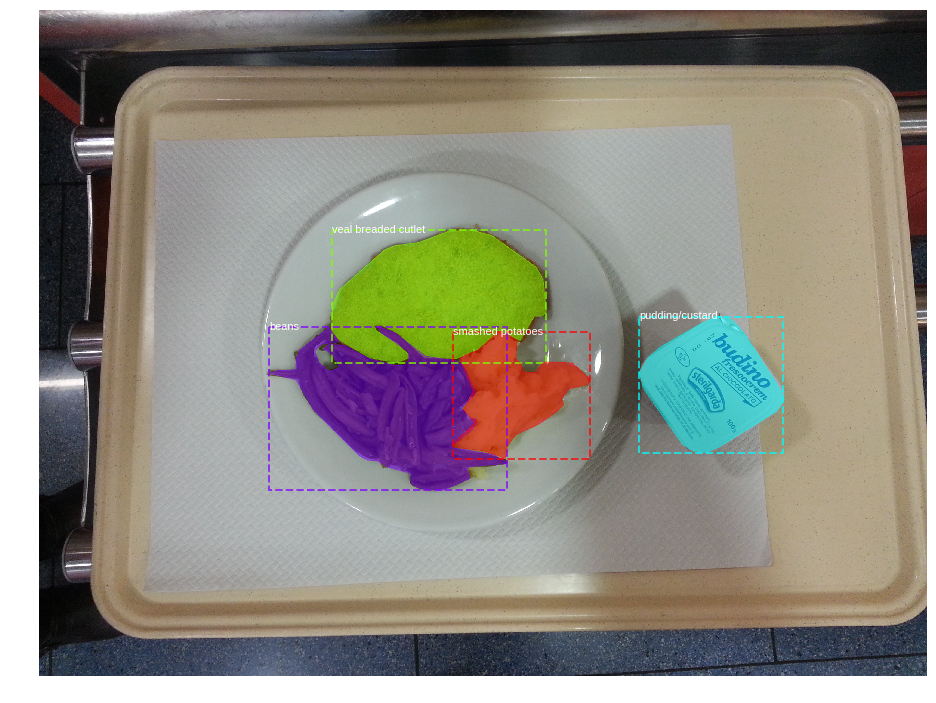

In [86]:
# image_id = random.choice(dataset_val
#                          .image_ids)
image = dataset_val.load_image(image_id)
mask, class_ids = dataset_val.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_val.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_val.class_names)
original_image=image

In [0]:
plt.axis("off")
plt.imshow(image)

In [0]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Processing 1 images
image                    shape: (2448, 3264, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 25)               min:    0.00000  max: 3264.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.04424  max:    0.99885  float32


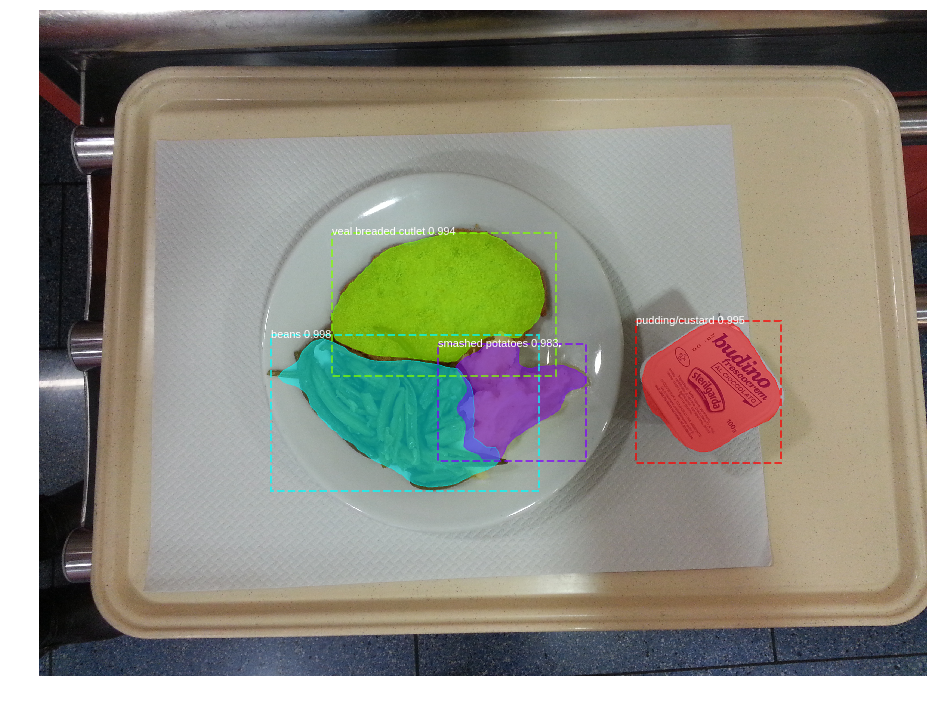

In [88]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])

# Approach Calorie estimation
The calorie estimation requires the weight of the food product to be accurate 

---

As we have only the image with us we need to estimate the weight of the food with the provided image


---

Systems with multiple should find it easy to analyse depth of the food presented but pinhole cameras lack the functionality

---


For this purpose we choose refrencing a known object in the image and computing the size of food in image


---


Using known object surface area  we calculate the 'pixel per inches square" value for the given image which gives off the pixel density for an inch square of real life area so that we can compute the real life  surface area hold by  the shown food item


---

# real_food_area = masked_food_pixel_area / pixels_per_inch

In [64]:
masked_plate_pixels=1130972
real_plate_size=12
real_plate_area=113.04
pixels_per_inch_sq=masked_plate_pixels/real_plate_area
calories=[]
items=[]
for i in range(r['masks'].shape[-1]):
#   print(i)
  masked_food_pixels=r['masks'][:,:,i].sum()
  class_name=dataset_val.class_names[r['class_ids'][i]]
  real_food_area=masked_food_pixels/pixels_per_inch_sq
  calorie=food.get_calorie(class_name,real_food_area)
  calories.append(calorie)
  items.append(class_name)
  print("{1} with {0} calories".format(int(calorie),class_name))

beans with 13 calories
pudding/custard with 130 calories
veal breaded cutlet with 121 calories
smashed potatoes with 17 calories


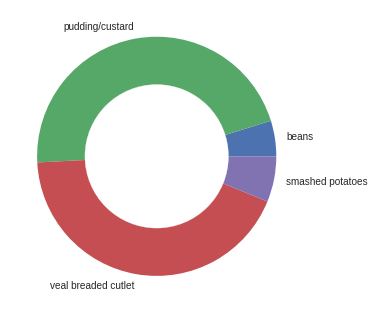

In [68]:
import matplotlib.pyplot as plt
 
# Create a pieplot
plt.pie(calories,labels=items)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()


# Evaluation of the model
We compute average precision of 40 pictures and print out the average 

In [90]:
image_ids = np.random.choice(dataset_val.image_ids, 40)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.936666666790843
